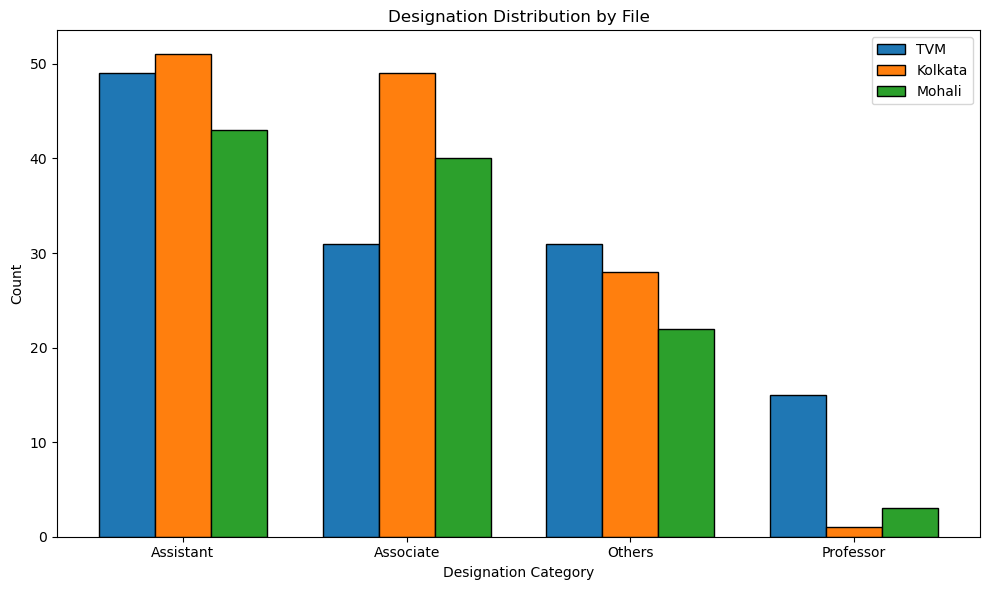

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files
file1 = pd.read_csv(r"C:\Users\Sirsha\Desktop\project\DATA\IISER_TVM_I.csv")
file2 = pd.read_csv(r"C:\Users\Sirsha\Desktop\project\DATA\IISER_KOLKATA.csv")
file3 = pd.read_csv(r"C:\Users\Sirsha\Desktop\project\DATA\IISER_MOHALI_I.csv")


# Concatenate the three files
combined_data = pd.concat([file1, file2, file3])

# Convert columns to lowercase for case-insensitive matching
combined_data['Designation'] = combined_data['Designation'].str.lower()

# Group and categorize the data
def categorize_designation(designation):
    if pd.notna(designation):
        designation = designation.lower()
        if 'assistant' in designation:
            return 'Assistant'
        elif 'associate' in designation:
            return 'Associate'
        elif designation == 'professor':
            return 'Professor'
    return 'Others'

combined_data['designation_category'] = combined_data['Designation'].apply(categorize_designation)

# Group by categories and count occurrences for each file
designation_counts_file1 = file1['Designation'].apply(categorize_designation).value_counts()
designation_counts_file2 = file2['Designation'].apply(categorize_designation).value_counts()
designation_counts_file3 = file3['Designation'].apply(categorize_designation).value_counts()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
bar_positions_file1 = range(len(designation_counts_file1))
bar_positions_file2 = [pos + bar_width for pos in bar_positions_file1]
bar_positions_file3 = [pos + bar_width for pos in bar_positions_file2]

ax.bar(bar_positions_file1, designation_counts_file1, width=bar_width, label='TVM', edgecolor='black')
ax.bar(bar_positions_file2, designation_counts_file2, width=bar_width, label='Kolkata', edgecolor='black')
ax.bar(bar_positions_file3, designation_counts_file3, width=bar_width, label='Mohali', edgecolor='black')

ax.set_xticks([pos + bar_width for pos in bar_positions_file1])
ax.set_xticklabels(designation_counts_file1.index)
ax.set_xlabel('Designation Category')
ax.set_ylabel('Count')
ax.set_title('Designation Distribution by File')

ax.legend()
plt.tight_layout()
plt.show()




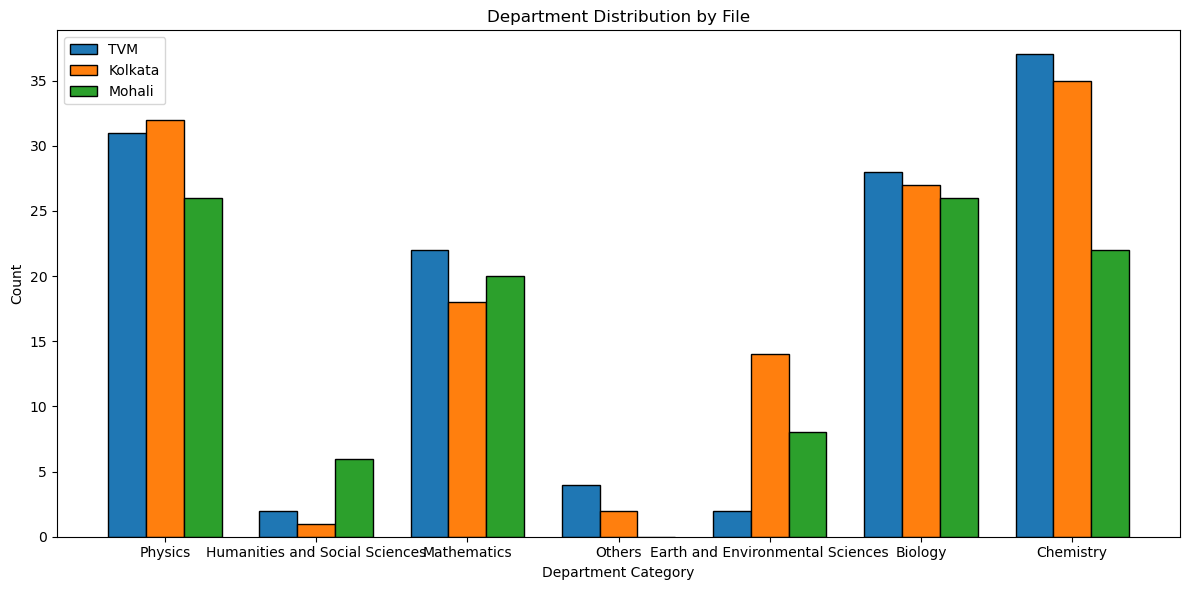

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files
file1 = pd.read_csv(r"C:\Users\Sirsha\Desktop\project\DATA\IISER_TVM_I.csv")
file2 = pd.read_csv(r"C:\Users\Sirsha\Desktop\project\DATA\IISER_KOLKATA.csv")
file3 = pd.read_csv(r"C:\Users\Sirsha\Desktop\project\DATA\IISER_MOHALI_I.csv")

# Concatenate the three files
combined_data = pd.concat([file1, file2, file3])

# Convert columns to lowercase for case-insensitive matching
combined_data['Department'] = combined_data['Department'].str.lower()

# Group and categorize the data
def categorize_department(department):
    if pd.notna(department):
        department = department.lower()
        if 'bio' in department:
            return 'Biology'
        elif 'chem' in department:
            return 'Chemistry'
        elif 'phy' in department:
            return 'Physics'
        elif 'math' in department:
            return 'Mathematics'
        elif 'earth' in department or 'ees' in department:
            return 'Earth and Environmental Sciences'
        elif 'human' in department or 'hss' in department:
            return 'Humanities and Social Sciences'
    return 'Others'

combined_data['department_category'] = combined_data['Department'].apply(categorize_department)

# Create a set of all unique categories
all_categories = set(combined_data['department_category'])

# Group by categories and count occurrences for each file
department_counts_file1 = file1['Department'].apply(categorize_department).value_counts().reindex(all_categories, fill_value=0)
department_counts_file2 = file2['Department'].apply(categorize_department).value_counts().reindex(all_categories, fill_value=0)
department_counts_file3 = file3['Department'].apply(categorize_department).value_counts().reindex(all_categories, fill_value=0)

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
bar_positions_file1 = range(len(department_counts_file1))
bar_positions_file2 = [pos + bar_width for pos in bar_positions_file1]
bar_positions_file3 = [pos + bar_width for pos in bar_positions_file2]

ax.bar(bar_positions_file1, department_counts_file1, width=bar_width, label='TVM', edgecolor='black')
ax.bar(bar_positions_file2, department_counts_file2, width=bar_width, label='Kolkata', edgecolor='black')
ax.bar(bar_positions_file3, department_counts_file3, width=bar_width, label='Mohali', edgecolor='black')

ax.set_xticks([pos + bar_width for pos in bar_positions_file1])
ax.set_xticklabels(department_counts_file1.index)
ax.set_xlabel('Department Category')
ax.set_ylabel('Count')
ax.set_title('Department Distribution by File')

ax.legend()
plt.tight_layout()
plt.show()
